In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df['total spend']= df['TV']+df['radio']+df['newspaper']
df

,TV,radio,newspaper,sales,total spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


<Axes: xlabel='total spend', ylabel='sales'>

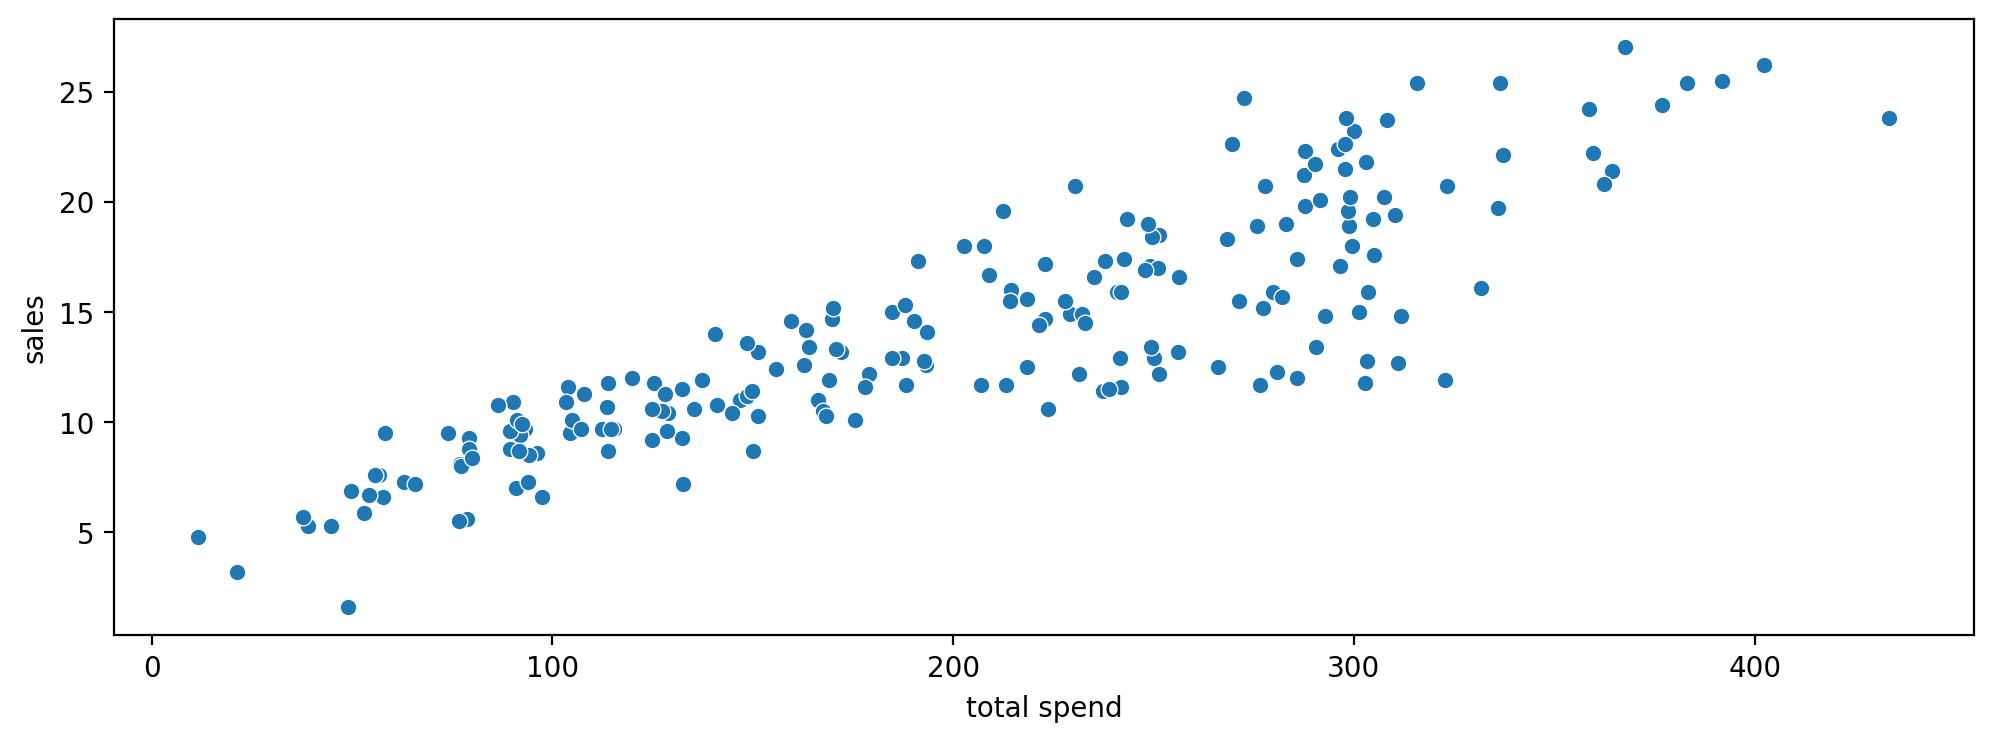

In [4]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='total spend',y='sales')

<Axes: xlabel='total spend', ylabel='sales'>

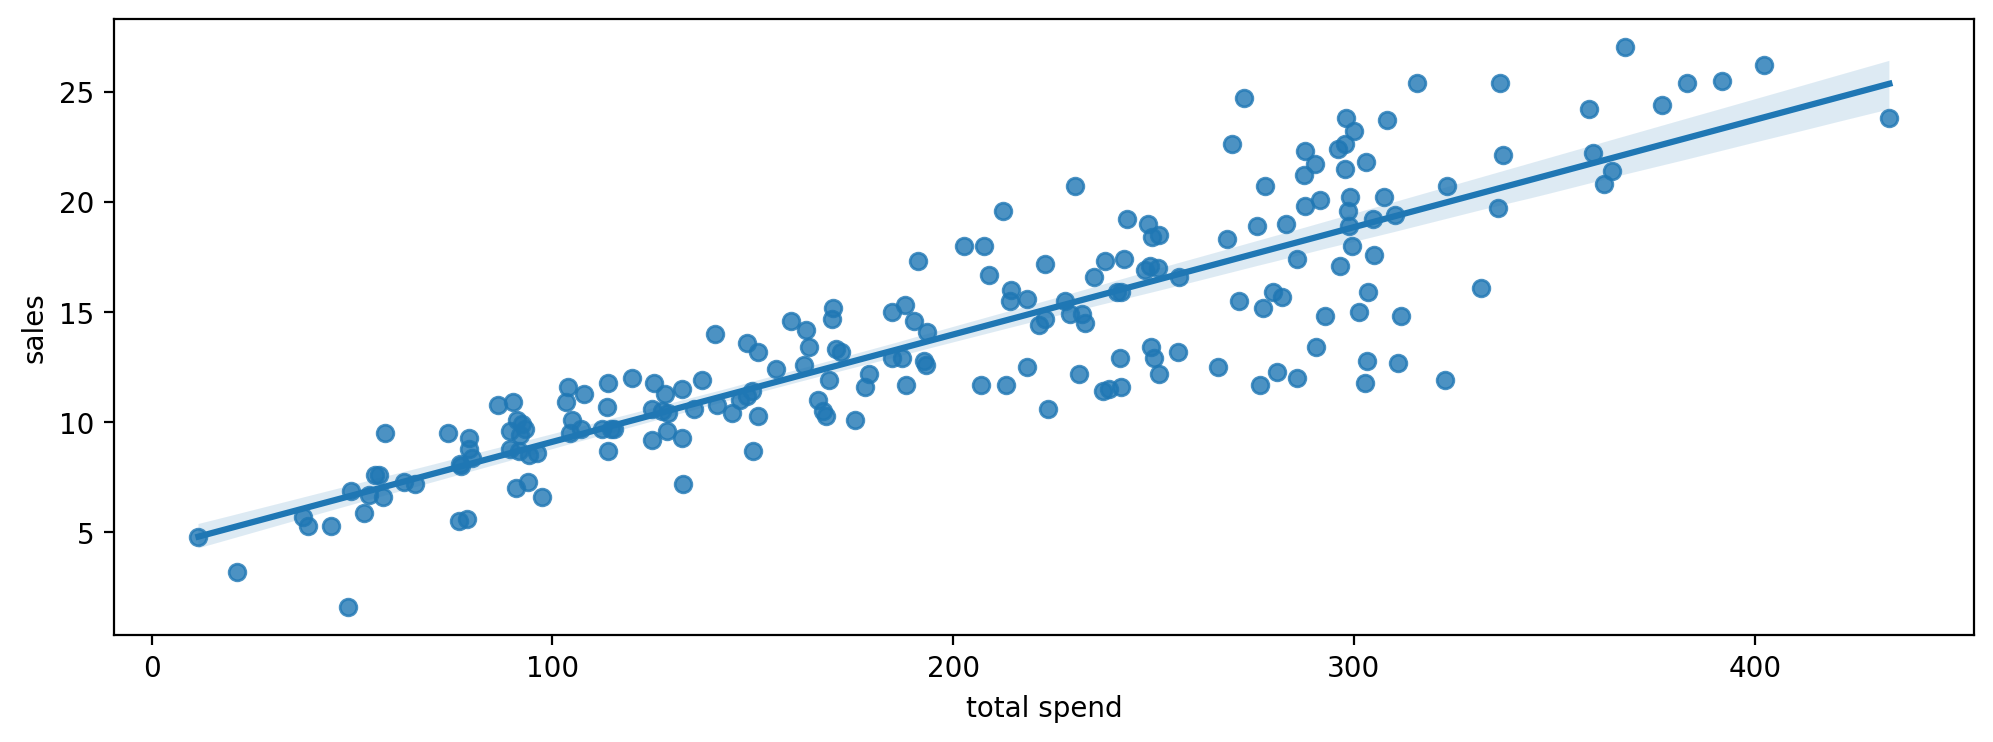

In [5]:
plt.figure(figsize=(12,4),dpi=200)
sns.regplot(data=df,x='total spend',y='sales')

In [6]:
X=df['total spend']
y=df['sales']

In [7]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [8]:
potential_spend=np.linspace(0,500,100)
potential_sales=0.048*potential_spend+4.243

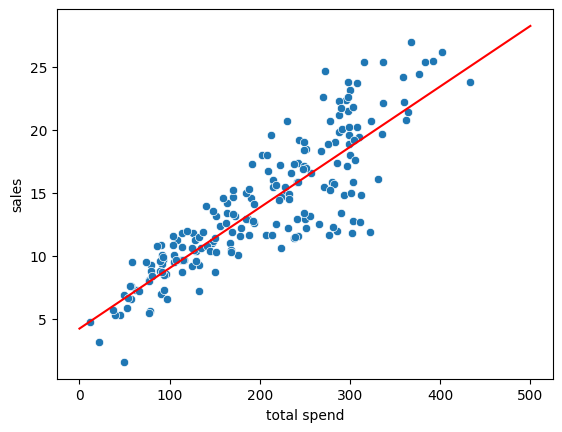

In [9]:
sns.scatterplot(data=df,x='total spend',y='sales')
plt.plot(potential_spend,potential_sales,color='red')

In [10]:
np.polyfit(X,y,deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [11]:
pot_spend=np.linspace(0,500,100)
pot_sales=3.07615033e-07*pot_spend**3-1.89392449e-04*pot_spend**2+8.20886302e-02*pot_spend+ 2.70495053e+00

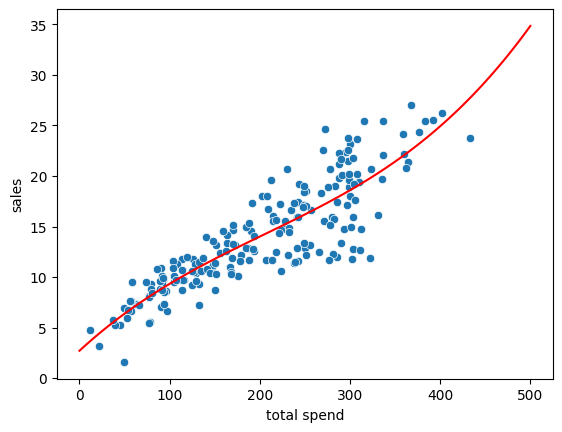

In [12]:
sns.scatterplot(data=df,x='total spend',y='sales')
plt.plot(pot_spend,pot_sales,color='red')


### using scikit learn

In [13]:
df=pd.read_csv('./Advertising.csv')


In [14]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Text(0.5, 1.0, 'radio spend')

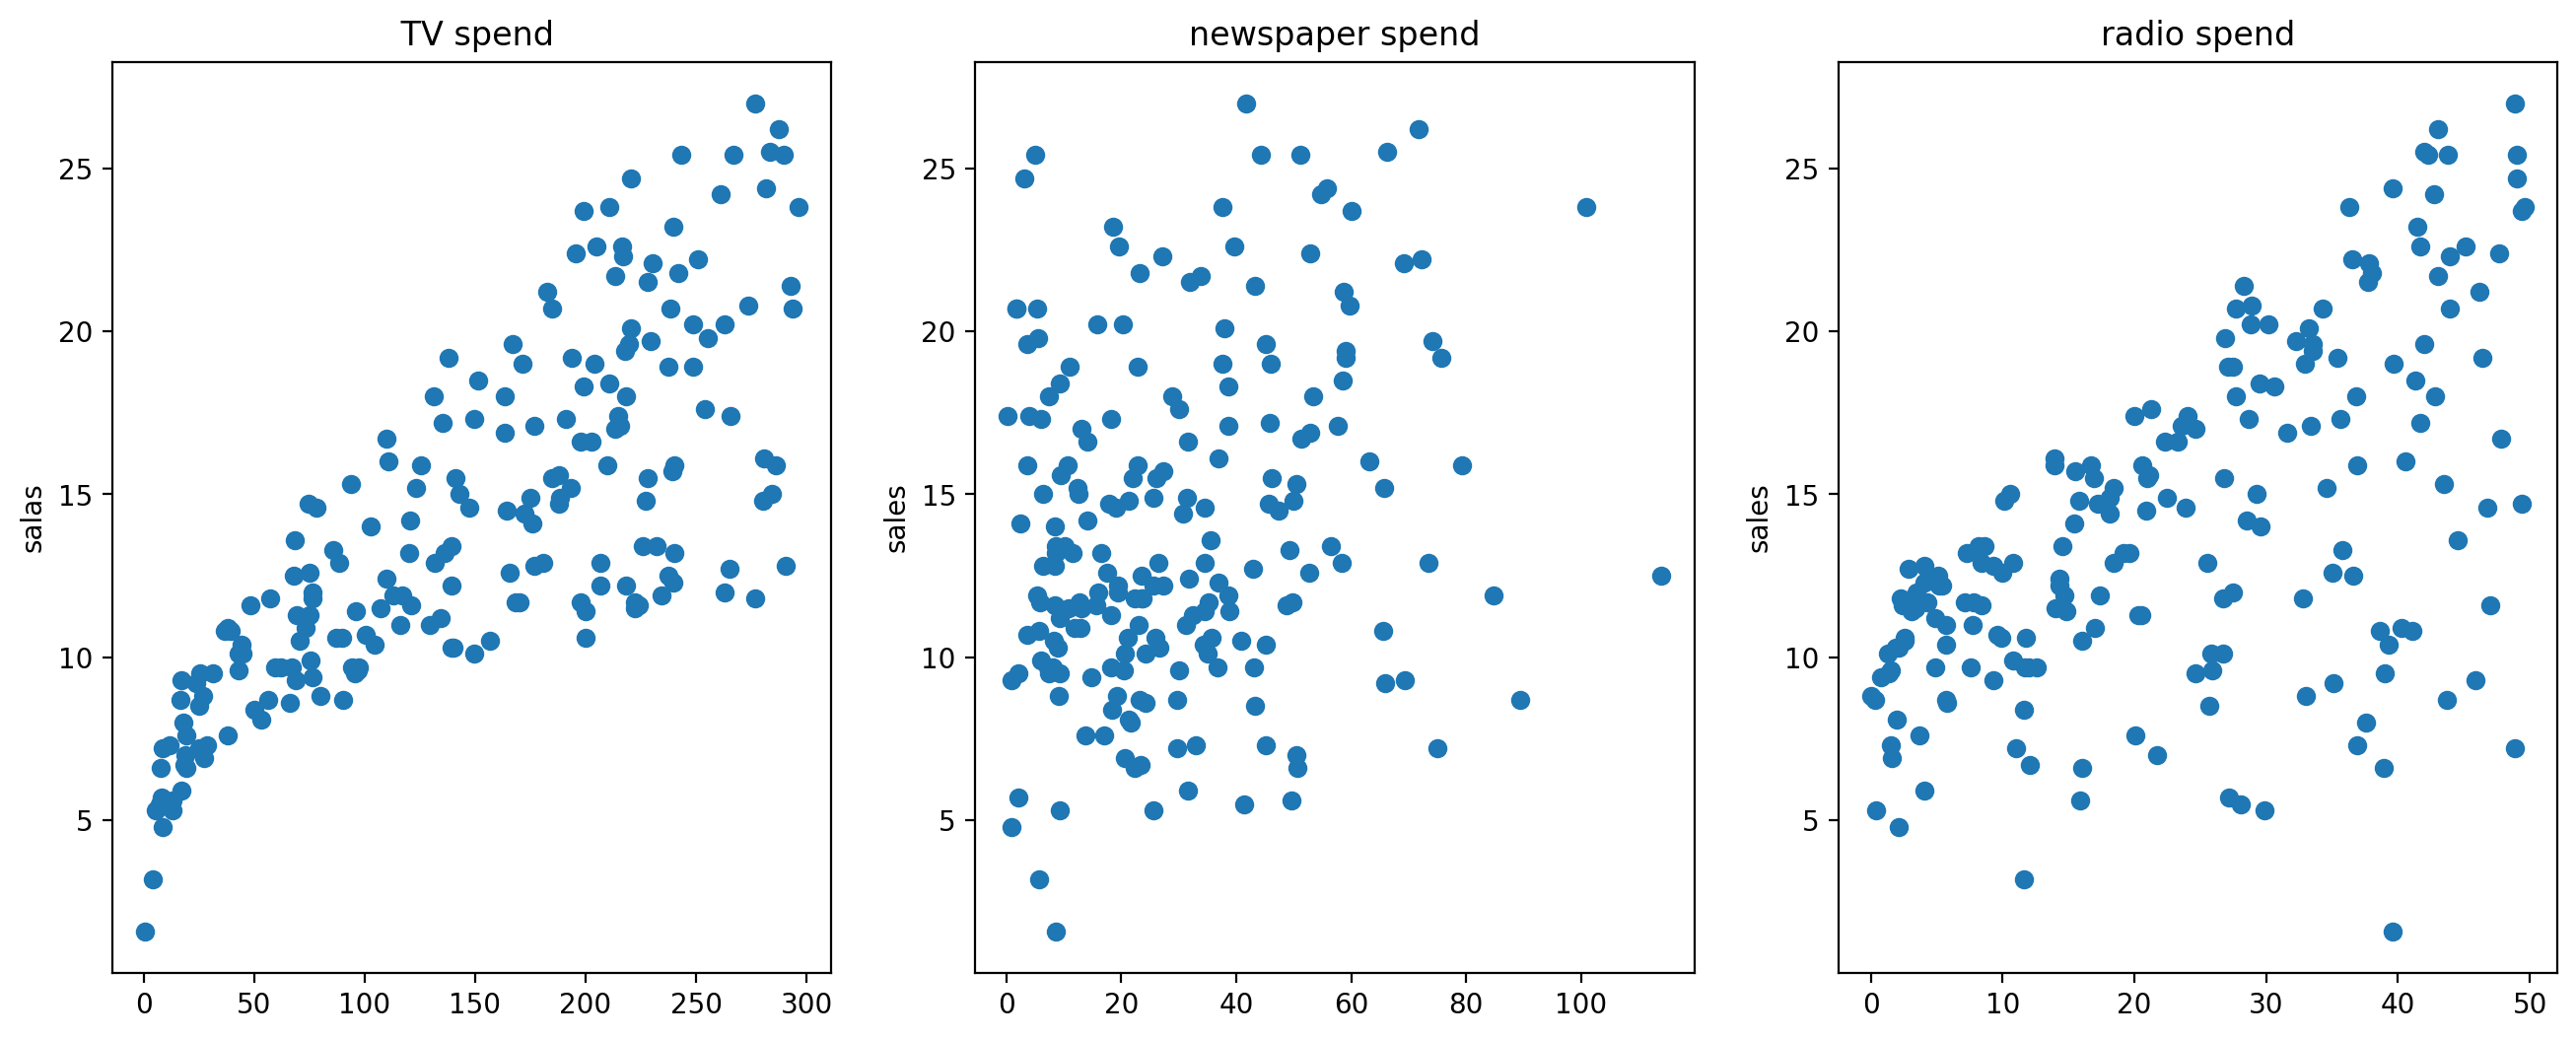

In [15]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6),dpi=200)
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel('salas')
axes[0].set_title(' TV spend')
axes[1].plot(df['newspaper'],df['sales'],'o')
axes[1].set_ylabel('sales')
axes[1].set_title('newspaper spend')
axes[2].plot(df['radio'],df['sales'],'o')
axes[2].set_ylabel('sales')
axes[2].set_title('radio spend')


In [16]:
X=df[['TV','radio','newspaper']]
y=df['sales']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [23]:
model=LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
test_prediction=model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [27]:
mean_absolute_error(y_test,test_prediction)

1.5116692224549086

In [28]:
mean_squared_error(y_test,test_prediction)

3.79679723671522

In [29]:
np.sqrt(mean_squared_error(y_test,test_prediction))

1.9485372043446387

In [30]:
test_residuals=y_test-test_prediction

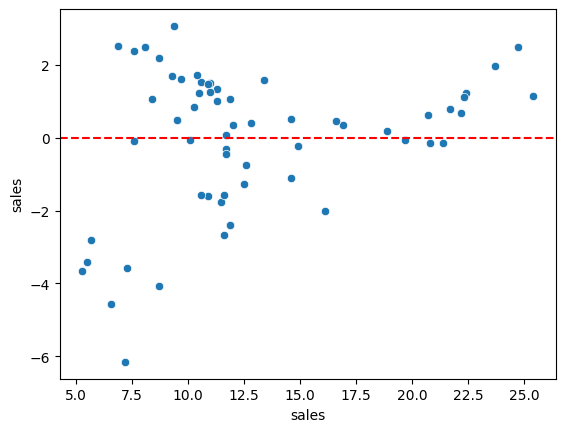

In [31]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',ls='--')

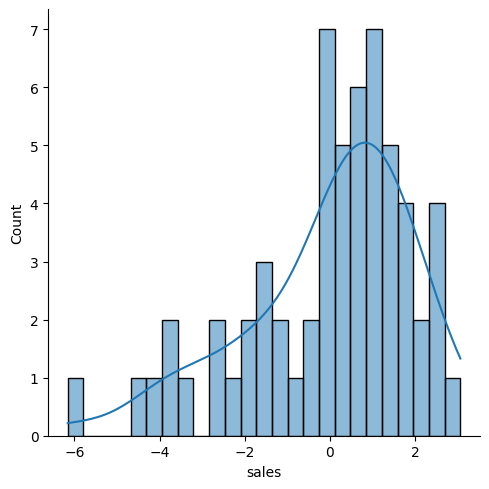

In [32]:
sns.displot(test_residuals,kde=True,bins=25)

In [33]:
import scipy as sp

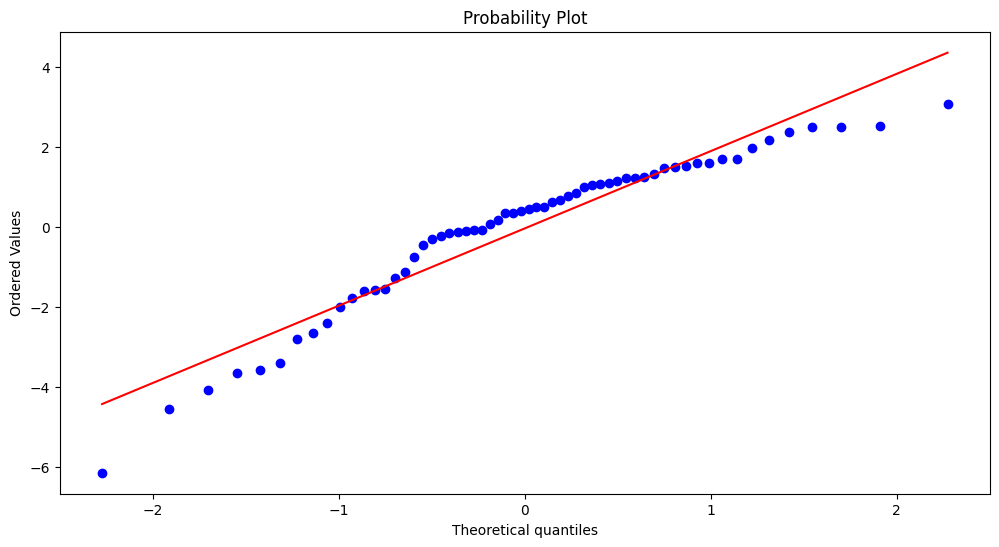

In [34]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
_=sp.stats.probplot(test_residuals,plot=ax)

In [35]:
final_model=LinearRegression()

In [36]:
final_model.fit(X,y)

LinearRegression()

In [37]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [38]:
y_hat=final_model.predict(X)

Text(0, 0.5, 'sales')

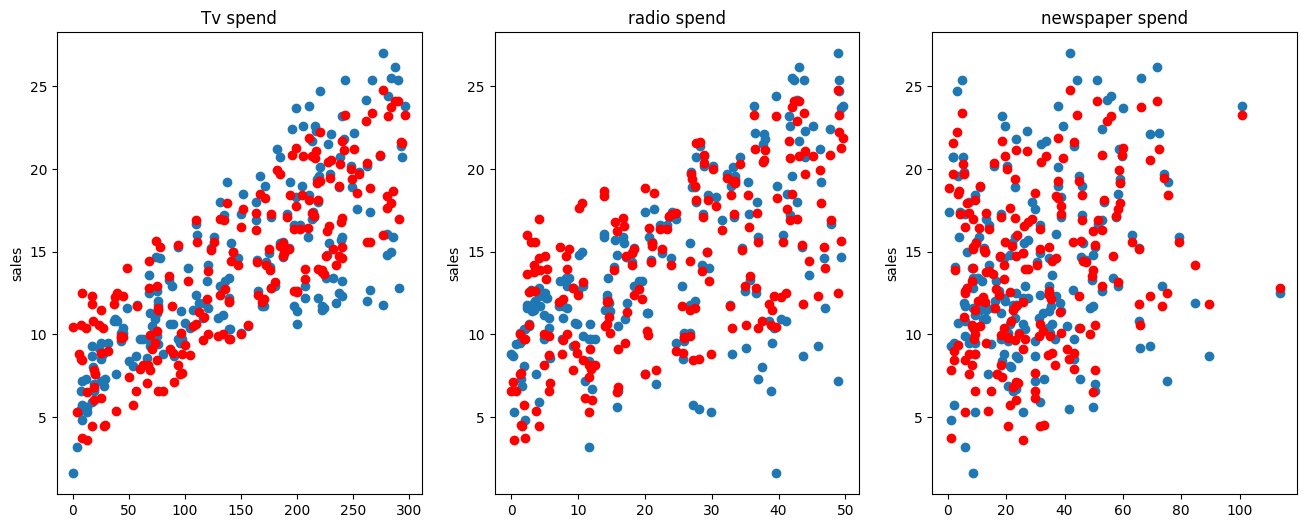

In [39]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_title('Tv spend')
axes[0].set_ylabel('sales')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title('radio spend')
axes[1].set_ylabel('sales')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title('newspaper spend')
axes[2].set_ylabel('sales')

In [40]:
from joblib import dump,load

In [41]:
dump(final_model,'final_sales.joblib')


['final_sales.joblib']

In [42]:
loaded_model=load('final_sales.joblib')

In [43]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [44]:
campaign=[[149,22,12]]
loaded_model.predict(campaign)

c:\Users\adeeb\OneDrive\Desktop\python\machine learning course\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

### Polynomial regression

In [45]:
df=pd.read_csv('./Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [46]:
X=df[['TV','newspaper','radio']]
y=df['sales']

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
polynomial_convert=PolynomialFeatures(degree=2,include_bias=False)

In [49]:
polynomial_convert.fit(X)

PolynomialFeatures(include_bias=False)

In [50]:
poly_features=polynomial_convert.transform(X)

In [51]:
X.iloc[0]

TV           230.1
newspaper     69.2
radio         37.8
Name: 0, dtype: float64

In [52]:
poly_features[0]
# after applying polynomial converter we basically get 6 more values this is because polynomial regression is more about
# how each feature interacts with each other and how it correlates with each other 
# in the below array the first 3 numbers are normal and the next 3 are the first feature multiplying with the second one and the
# second one multiplying with the third one and 1st and 2nd multiplying and the last three are squares of each fetature in a column
# train_test_split() 

array([2.301000e+02, 6.920000e+01, 3.780000e+01, 5.294601e+04,
       1.592292e+04, 8.697780e+03, 4.788640e+03, 2.615760e+03,
       1.428840e+03])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [54]:
model=LinearRegression()

In [55]:
model.fit(X_train,y_train)

LinearRegression()

In [56]:
test_prediction=model.predict(X_test)

In [57]:
mae=mean_absolute_error(y_test,test_prediction)
mse=mean_squared_error(y_test,test_prediction)
rmse=np.sqrt(mse)

In [58]:
mse

0.523194494905529

In [59]:
model.coef_

array([ 0.05478172,  0.01086391,  0.01311214, -0.00011074, -0.00010764,
        0.00108048,  0.00010075,  0.00017541,  0.00030191])

In [60]:
train_rmse_error=[]
test_rmse_error=[]
for d in range(1,10):
    poly_convert=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=polynomial_convert.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    model=LinearRegression()
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_predict=model.predict(X_test)
    train_rmse=(np.sqrt(mean_squared_error(y_train,train_pred)))
    test_rmse=(np.sqrt(mean_squared_error(y_test,test_predict)))
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)
    

In [61]:
train_rmse_error

[0.5950712355838925,
 0.5950712355838925,
 0.5950712355838925,
 0.5950712355838925,
 0.5950712355838925,
 0.5950712355838925,
 0.5950712355838925,
 0.5950712355838925,
 0.5950712355838925]

In [62]:
test_rmse_error

[0.7233218473857465,
 0.7233218473857465,
 0.7233218473857465,
 0.7233218473857465,
 0.7233218473857465,
 0.7233218473857465,
 0.7233218473857465,
 0.7233218473857465,
 0.7233218473857465]

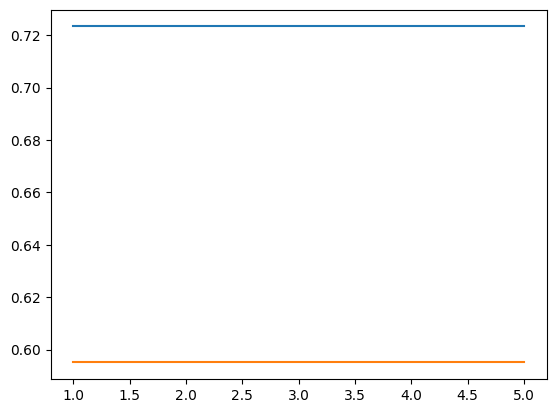

In [63]:
plt.plot(range(1,6),test_rmse_error[:5])
plt.plot(range(1,6),train_rmse_error[:5])

In [64]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [65]:
final_model=LinearRegression()

In [66]:
full_converted_x=final_poly_converter.fit_transform(X)
final_model.fit(full_converted_x,y)

LinearRegression()

In [67]:
from joblib import dump,load

In [68]:
dump(final_model,'finalpolymodel.joblib')

['finalpolymodel.joblib']

In [69]:
dump(final_poly_converter,'finalconvertermodel.joblib')

['finalconvertermodel.joblib']

In [70]:
load_converter=load('finalconvertermodel.joblib')

In [71]:
load_model=load('finalpolymodel.joblib')

In [72]:
campaign=[[149,22,12]]

In [73]:
transformed_data=load_converter.fit_transform(campaign)

In [74]:
load_model.predict(transformed_data)

array([12.57144304])

In [77]:
df=pd.read_csv('./Advertising.csv')

In [78]:
X=df.drop('sales',axis=1)

In [79]:
y=df['sales']

In [80]:
from sklearn.preprocessing import PolynomialFeatures

In [81]:
poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [82]:
poly_features=poly_converter.fit_transform(X)

In [83]:
poly_features.shape

(200, 19)

In [84]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [90]:
X_train.shape

(140, 19)

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler= StandardScaler()

In [91]:
scaler.fit(X_train)

StandardScaler()

In [92]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [93]:
from sklearn.linear_model import Ridge

In [94]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model._ridge:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Constant that multiplies the L2 term, controlling regula

In [95]:
ridge_model=Ridge(alpha=10)
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [96]:
test_prediction=ridge_model.predict(X_test)

In [97]:
mae=mean_absolute_error(y_test,test_prediction)

In [98]:
rmse=np.sqrt(mean_squared_error(y_test,test_prediction))

In [99]:
from sklearn.linear_model import RidgeCV

In [106]:
ridge_Cv_model=RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_squared_error')

In [107]:
ridge_Cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_squared_error')

In [108]:
ridge_Cv_model.alpha_

0.1

In [109]:
from sklearn.metrics import SCORERS

In [105]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [110]:
test_prediction=ridge_Cv_model.predict(X_test)

In [111]:
mae=mean_absolute_error(y_test,test_prediction)

In [112]:
rmse=np.sqrt(mean_squared_error(y_test,test_prediction))

In [113]:
ridge_Cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

In [115]:
from sklearn.linear_model import LassoCV

In [125]:
lasso_CV_model=LassoCV(eps=0.1,n_alphas=100,cv=5)

In [126]:
lasso_CV_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [127]:
lasso_CV_model.alpha_

0.4943070909225832

In [128]:
test_prediction=lasso_CV_model.predict(X_test)

In [130]:
mae=mean_absolute_error(y_test,test_prediction)
mae

0.6541723161252867

In [132]:
rmse=np.sqrt(mean_squared_error(y_test,test_prediction))
rmse

1.1308001022762548

In [133]:
lasso_CV_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [134]:
from sklearn.linear_model import ElasticNetCV

In [137]:
elastic_model=ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],eps=0.001,n_alphas=100,max_iter=100)

In [138]:
elastic_model.fit(X_train,y_train)

c:\Users\adeeb\OneDrive\Desktop\python\machine learning course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2848815555449562, tolerance: 0.28168049107142856
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\adeeb\OneDrive\Desktop\python\machine learning course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.29518716910199316, tolerance: 0.28168049107142856
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\adeeb\OneDrive\Desktop\python\machine learning course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.33256027039323754, tolerance: 0.28168049107142856
  

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=100)

In [141]:
elastic_model.l1_ratio_

1.0

In [142]:
elastic_model.alpha_

0.004943070909225833

In [143]:
test_prediction=elastic_model.predict(X_test)

In [145]:
mae=mean_absolute_error(y_test,test_prediction)
mae

0.5331840808962245